In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mode
from seaborn import heatmap

In [57]:
data = pd.read_csv('../heat_phases.txt', '\t')
data.head()

,A,alpha,y
0,0.0,1.570796,90.31496932891166;90.31499017632511;90.3150261...
1,0.0,1.560796,170.4377948251106;170.70553914074304;170.07274...
2,0.0,1.550796,478.768336667076;478.76833642835504;478.768336...
3,0.0,1.540796,491.1571159601119;491.1571159596061;491.157115...
4,0.0,1.530796,493.0379126569509;493.0379126569479;493.037912...


In [58]:
def phases2count(s):
    s = s.split(';')
    s = np.array(s).astype(float)
    s = s.round(1)
    m = mode(s)[1][0]
    return m

In [99]:
data['count'] = data['y'].apply(phases2count)
data['alpha'] = data['alpha'].values.round(2)
data['A'] = data['A'].values.round(2)

In [100]:
data.head()

,A,alpha,y,count,beta
0,0.0,1.57,90.31496932891166;90.31499017632511;90.3150261...,107,0.000796
1,0.0,1.56,170.4377948251106;170.70553914074304;170.07274...,28,0.010796
2,0.0,1.55,478.768336667076;478.76833642835504;478.768336...,218,0.020796
3,0.0,1.54,491.1571159601119;491.1571159596061;491.157115...,207,0.030796
4,0.0,1.53,493.0379126569509;493.0379126569479;493.037912...,193,0.040796


In [102]:
A = np.sort(np.array(tuple(set(data['A']))))
alpha = np.sort(np.array(tuple(set(data['alpha']))))

In [90]:
F = np.zeros((A.shape[0], alpha.shape[0]))
for i, a in enumerate(A):
    for u, al in enumerate(alpha):
        ind = np.logical_and(data['A'] == a, data['alpha'] == al)
        F[i][u] = data[ind]['count'] / 256

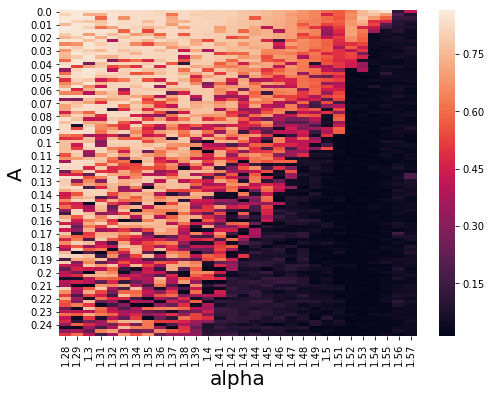

In [92]:
plt.figure(figsize=(8, 6))
heatmap(F)
yticks, _ = plt.yticks()
plt.yticks(yticks, labels=A, rotation=0)
plt.ylabel('A', fontsize=20)

xticks, _ = plt.xticks()
plt.xticks(xticks, labels=alpha)
plt.xlabel('alpha', fontsize=20)

plt.show()